<a href="https://colab.research.google.com/github/pragneshrana/Algo_Trial/blob/master/EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#calling library
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [0]:
N = 100 #generating size of data  points
mu_arr = np.array([1, 10]) #mean array of 1 and  10 
sigma_arr = np.array([1, 1])  #variance array of 1 and  10 
x = np.append(np.random.normal(mu_arr[0], sigma_arr[0], N), 
              np.random.normal(mu_arr[1], sigma_arr[1], N)) #N**2 points

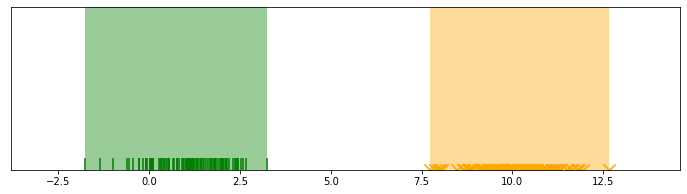

In [6]:
#plotting
fig, ax = plt.subplots(figsize=(12,3))
ax.scatter(x[:N], np.zeros(N), c='green', marker=2, s=150)
ax.scatter(x[N:], np.zeros(N), c='orange', marker='x', s=150)
ax.set_ylim([-1e-4, 1e-4])
_ = ax.set_yticks([])
sns.distplot(x[:N], color='green')
sns.distplot(x[N:], color='orange')


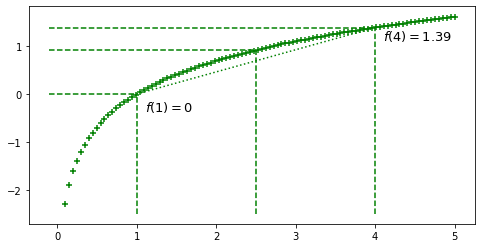

In [11]:
#ln plotting 
x = np.linspace(.1, 5, 100)
y = np.log(x)
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x, y, color='green', marker='+')
## 1 (p=0.5)
ax.vlines(x=1, ymin=-2.5, ymax=0, linestyle='--', color='green')
ax.hlines(y=0, xmin=-.1, xmax=1, linestyle='--', color='green')
ax.text(x=1.1, y=np.log(.7), s='$f(1)=0$',
        fontdict={'size': 13})
## 4 (p=0.5)
ax.vlines(x=4, ymin=-2.5, ymax=np.log(4), linestyle='--', color='green')
ax.hlines(y=np.log(4), xmin=-.1, xmax=4, linestyle='--', color='green')
ax.text(x=4.1, y=np.log(3.1), 
        s='$f(4)=%.2f$'%(np.log(4)),
        fontdict={'size': 13}
       )
ax.plot([1, 4], np.log([1, 4]), color='green', linestyle='dotted')
# E(x) = (1+4)/2 = 2.5
ax.vlines(x=2.5, ymin=-2.5, ymax=np.log(2.5), linestyle='--', color='green')
ax.hlines(y=np.log(2.5), xmin=-.1, xmax=2.5, linestyle='--', color='green')
